In [1]:
import pandas as pd

In [26]:
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)


In [33]:
%matplotlib inline

In [3]:
data = pd.read_csv('data/events.csv')

/home/july/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

# ¿Cuántas veces ve el producto un usario antes de comprarlo?

In [5]:
data.event.value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [6]:
view_conv = data[(data['event'] == 'viewed product') | (data['event']== 'conversion')]

In [41]:
check_conv = data[(data['event'] == 'checkout') | (data['event']== 'conversion')]

In [43]:
view_conv.shape

(3951, 23)

In [44]:
check_conv.shape

(34907, 23)

Me fijo cuales son los usuarios que hiciero compras:

In [8]:
user_conversion = view_conv[view_conv['event']=='conversion']

In [9]:
user_conversion.shape

(1172, 23)

In [10]:
user_conversion = user_conversion.drop_duplicates(subset='person')

In [11]:
user_conversion =  user_conversion[['person','sku']]

In [12]:
user_conversion.shape

(716, 2)

In [13]:
view_conv = pd.merge(view_conv, user_conversion, on = ['person','sku'], \
                     how = 'inner')

In [45]:
check_conv = pd.merge(check_conv, user_conversion, on= ['person','sku'],how= 'inner')

In [14]:
view_conv.shape

(3951, 23)

In [46]:
check_conv.shape

(2027, 23)

In [15]:
view_conv.head(2)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-03-20 17:46:12,conversion,00204059,NaN,3084,Motorola Moto X2,Muito Bom,32GB,Couro Vintage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-04-26 22:13:37,viewed product,00c13dee,NaN,6650,Samsung Galaxy Core Plus Duos TV,Muito Bom,4GB,Branco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
group_by_person_sku = view_conv.groupby(['person','sku'])['event'].value_counts().reset_index(name='cantidad')

In [47]:
group_by_person_sku2 = check_conv.groupby(['person','sku'])['event'].value_counts().reset_index(name='cantidad')

In [17]:
group_by_person_sku.head(2)

,person,sku,event,cantidad
0,00204059,3084,conversion,1
1,00c13dee,6650,viewed product,2


In [50]:
group_by_person_sku2.head()

,person,sku,event,cantidad
0,00204059,3084,conversion,1
1,00c13dee,6650,checkout,3
2,00c13dee,6650,conversion,1
3,00fdbb4b,3348,checkout,1
4,00fdbb4b,3348,conversion,1


In [18]:
product_and_person_conversion = group_by_person_sku[group_by_person_sku['event']=='conversion']

In [51]:
product_and_person_conversion2 = group_by_person_sku2[group_by_person_sku2['event']=='conversion']

In [19]:
product_and_person_conversion.shape

(716, 4)

In [52]:
product_and_person_conversion2.shape

(716, 4)

In [20]:
product_and_person_conversion = product_and_person_conversion[['person','sku']]

In [53]:
product_and_person_conversion2 = product_and_person_conversion2[['person','sku']]

In [21]:
df = pd.merge(group_by_person_sku,product_and_person_conversion,on=['person','sku'], how='inner')

In [54]:
df2 = pd.merge(group_by_person_sku2,product_and_person_conversion2,on=['person','sku'], how='inner')

In [22]:
df.shape

(1264, 4)

In [56]:
df2.shape

(1295, 4)

In [23]:
df.head()

,person,sku,event,cantidad
0,00204059,3084,conversion,1
1,00c13dee,6650,viewed product,2
2,00c13dee,6650,conversion,1
3,00fdbb4b,3348,conversion,1
4,00fdbb4b,3348,viewed product,1


In [27]:
pv = pd.pivot_table(df, values='cantidad', index=['person', 'sku'],
                     columns=['event'], aggfunc=np.sum)


In [57]:
pv2 = pd.pivot_table(df2, values='cantidad', index=['person', 'sku'],
                     columns=['event'], aggfunc=np.sum)


In [29]:
pv = pv.fillna(0)

In [58]:
pv2 = pv2.fillna(0)

In [30]:
pv.head()

,event,conversion,viewed product
person,sku,,
00204059,3084.0,1.0,0.0
00c13dee,6650.0,1.0,2.0
00fdbb4b,3348.0,1.0,1.0
0146a9df,2694.0,1.0,3.0
01db2fe6,6357.0,1.0,5.0


In [59]:
pv2.head()

,event,checkout,conversion
person,sku,,
00204059,3084.0,0.0,1.0
00c13dee,6650.0,3.0,1.0
00fdbb4b,3348.0,1.0,1.0
0146a9df,2694.0,1.0,1.0
01db2fe6,6357.0,2.0,1.0


In [ ]:
ax1 = df.plot(kind='scatter', x='a', y='b', color='r')    
ax2 = df.plot(kind='scatter', x='c', y='d', color='g', ax=ax1)    
ax3 = df.plot(kind='scatter', x='e', y='f', color='b', ax=ax1)

Text(0.5,1,'Cantidad Viewed Product vs Conversion.')

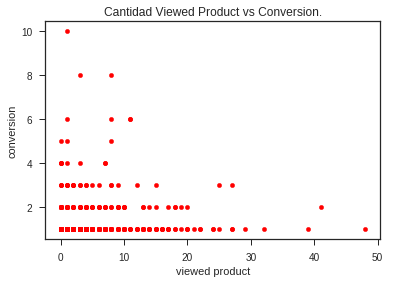

In [61]:
ax1 = pv.plot.scatter(x='viewed product', y='conversion',c='Red')
plt.title("Cantidad Viewed Product vs Conversion.")

Text(0.5,1,'Cantidad Checkout vs Conversion.')

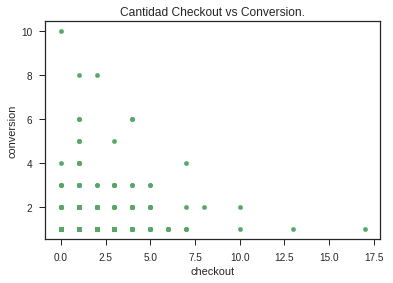

In [63]:
pv2.plot.scatter(x='checkout', y='conversion', c='g')
plt.title("Cantidad Checkout vs Conversion.")